Initialize

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vgc_2021 = pd.read_csv('pkmn/2021.csv')
vgc_2022 = pd.read_csv('pkmn/2022.csv')
pokedex = pd.read_csv('pkmn/pokedex.csv')
moves = pd.read_csv('pkmn/moves.csv')
pal = {'Bug':'olive', 'Dark':'dimgray', 'Dragon':'royalblue', 'Electric':'gold', 'Fairy':'pink', 'Fighting':'peru', 'Fire':'orangered', 'Flying':'tan', 'Ghost':'slateblue', 'Grass':'yellowgreen', 'Ground':'saddlebrown', 'Ice':'powderblue', 'Normal':'silver', 'Poison':'darkviolet', 'Psychic':'orchid', 'Rock':'darkgoldenrod', 'Steel':'cornflowerblue', 'Water':'dodgerblue'}

pokedex_nd = pokedex[pokedex.duplicated('pokedex_number', keep = 'first') == False]
poke_filter = pokedex_nd.loc[pokedex_nd.status != 'Normal']
mono_type = pokedex[pokedex['type_number'] == 1]
mono_type = mono_type[['name', 'type_1']]
dual_type = pokedex[pokedex['type_number'] == 2]
dual_type = dual_type[['name', 'type_1', 'type_2']]
medians = pokedex_nd.groupby(['generation'])['total_points'].median()
vertical_offset = pokedex['total_points'].median() * 0.1
gen_amount = pokedex_nd['generation'].value_counts().sort_index()

# Progetto Esame 09/09/24
## Fondamenti Di Scienza Dei Dati E Laboratorio
Trentin Tommaso - 167340

## Oggetto Dello Studio

Partiremo da una prima osservazione del Pokédex (fino all'ottava generazione), vera e propria banca dati del gioco.
Questo fornirà delle conoscenze di base per meglio comprendere il seguito.

Successivamente andremo ad analizzare i WC2021 / WC2022, mettendoli a confronto e vedendo come il meta si è evoluto dall'uno all'altro e quali sono le scelte competitivamente più efficaci.

L'obiettivo finale sarà capire se release date, tipo e categoria di un Pokémon possano influire sul suo utilizzo in contesti competitivi.

## Analisi - Domande Poste
L'analisi si suddividerà dunque in due parti principali:

------------------Evoluzione Del Gioco Per Generazioni------------------<br>
1 - Quanti e quali Pokémon sono stati aggiunti in ogni generazione?<br>
2 - Le varie generazioni sono equilibrate in ambito di base stats?<br>

---------------------World Championship 2021 & 2022---------------------<br>
3 - Quali tipi sono predominanti nel competitivo?<br>
4 - C'è equilibrio tra vittorie e sconfitte per Pokémon?<br>
5 - Quali sono le mosse maggiormente utilizzate?<br>

# Descrizione dei dati

Per la realizazione di questo progetto sono stati utilizzati un totale di 4 dataset:

- **pokedex.csv:** contenente informazioni sui singoli Pokémon (nome, tipi, statistiche), contenente dati fino alla Gen 8. Creato e pubblicato da Mario Tormo Romero su Kaggle nell'aprile 2021. [Dataset Link (presente come pokedex_(Update_04.21).csv)](https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420?select=pokedex_%28Update_04.21%29.csv)

- **moves.csv:** contenente informazioni sull'utilizzo delle mosse dei pokémon maggiormente utilizzati in VGC. Parte del dataset creato e pubblicato da Giorgio Carbone su Kaggle nel 2022. [Dataset Link (presente come bridge_pokemon_move_USED_WITH_MOVE.csv)](https://www.kaggle.com/datasets/giorgiocarbone/complete-competitive-pokmon-datasets-may-2022?select=df_pokemon.csv)

- **2021.csv** e **2022.csv:** contenenti informazioni riguardanti le percentuali d'utilizzo dei singoli Pokémon, rispettivamente nei mondiali del 2021 e del 2022. Da me realizzato utilizzando i dati presenti nei sito originali degli eventi. [Dataset 2021](https://2021.worldcupvgc.com/stats/pokemon) [Dataset 2022](https://2022.worldcupvgc.com/stats/pokemon)

# 1 - Quanti e quali Pokémon sono stati aggiunti in ogni generazione?

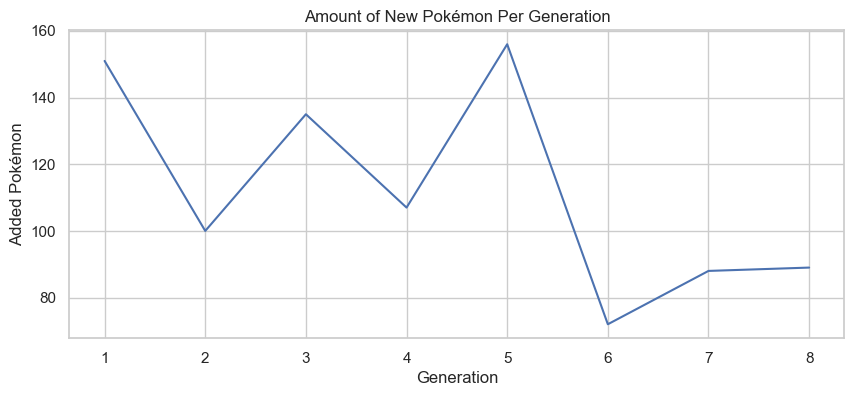

In [15]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (10,4))
ax = sns.lineplot(data = gen_amount).set(xlabel = 'Generation', ylabel = 'Added Pokémon', title = 'Amount of New Pokémon Per Generation')

In [37]:
%%HTML
<link rel="stylesheet" type="text/css" href="custom.css">

Da una prima analisi si può notare che l'introduzione di Pokémon si aggiri attorno ai 120 per generazione, con un calo nelle ultime 3 generazioni. (Forme Regionali!)

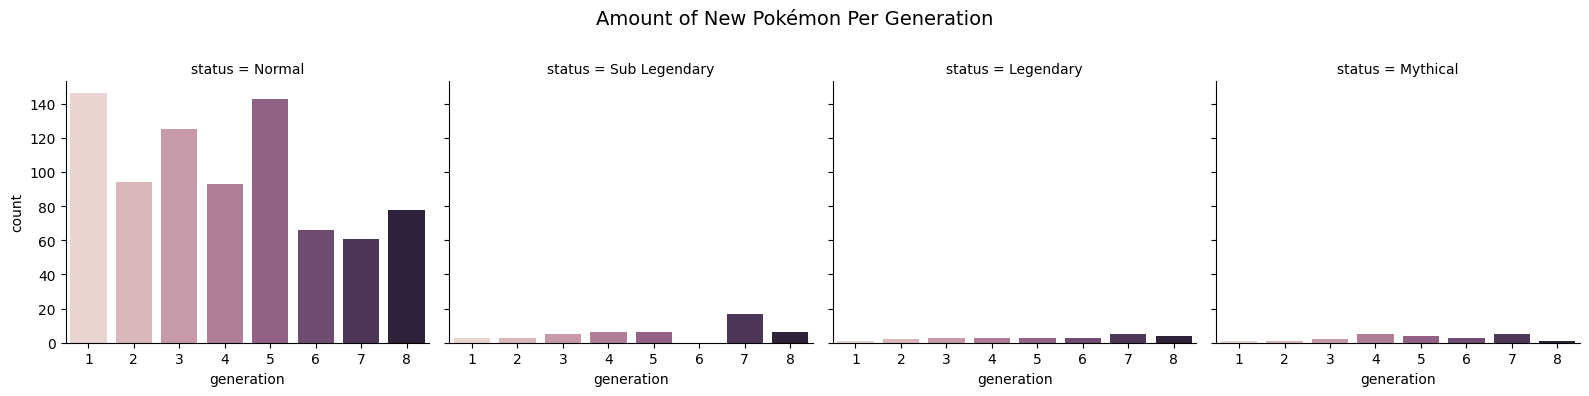

In [3]:
f=sns.catplot(x = 'generation', col = 'status', kind = 'count', hue = 'generation', legend = False, data = pokedex_nd, height = 4)
f.fig.subplots_adjust(top = 0.8);
f.fig.suptitle('Amount of New Pokémon Per Generation', fontsize = 14);

Questa visione dà certamente l'idea di quanto siano inferiori i numeri di Pokémon Sub-Leggendari, Leggendari e Mitici. Data però l'importanza che avranno nelle prossime analisi sarà meglio controllarli più nello specifico.

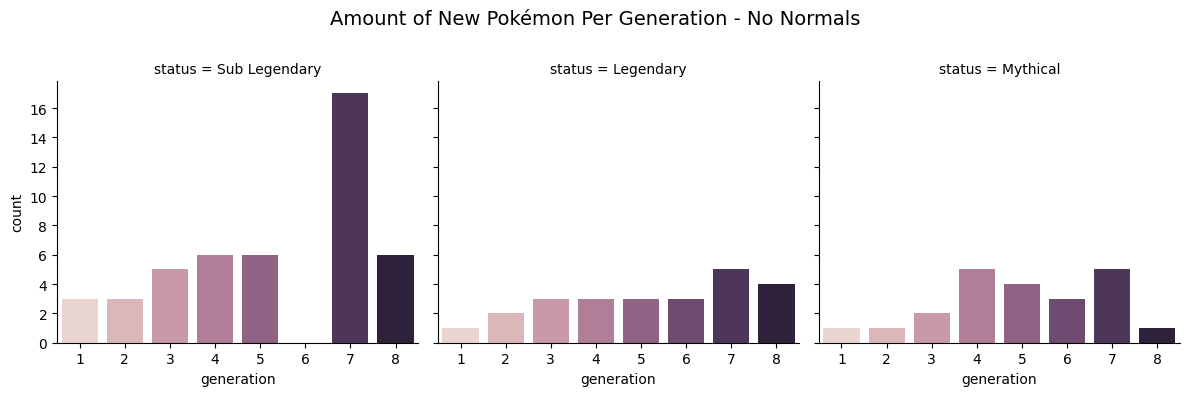

In [4]:
f=sns.catplot(x = 'generation', col = 'status', kind = 'count', hue = 'generation', legend = False, data = poke_filter, height = 4)
f.fig.subplots_adjust(top = 0.8);
f.fig.suptitle('Amount of New Pokémon Per Generation - No Normals', fontsize = 14);

Si può notare la differenza nelle tipologie di Pokémon aggiunti. **Sub-Leggendari, Leggendari e Mitici hanno** (di norma) **statistiche superiori a** buona parte dei **Pokémon Normali**.

# 2 - Le varie generazioni sono equilibrate in ambito di base stats?

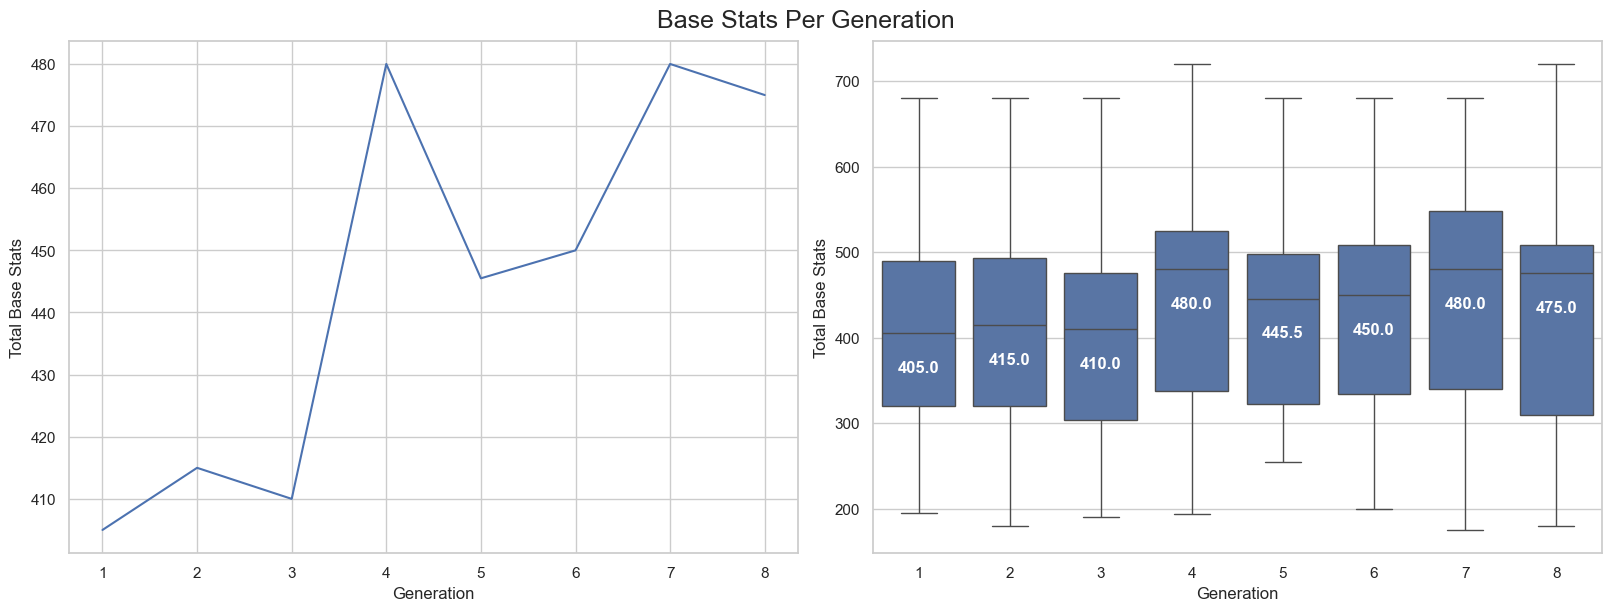

In [5]:
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(1, 2, figsize = (16, 6), layout = 'constrained')
f.suptitle('Base Stats Per Generation', fontsize = 18)

sns.lineplot(ax = ax[0], data = medians)
ax[0].set(xlabel = 'Generation', ylabel = 'Total Base Stats');

sns.boxplot(ax = ax[1], data = pokedex_nd, y = 'total_points', x = 'generation')
for xtick in ax[1].axes.get_xticks():
    median = medians[1+int(xtick)]
    ax[1].text(xtick, median - vertical_offset, medians[1+xtick], horizontalalignment = 'center',color = 'w', weight = 'semibold', fontsize = 12)
ax[1].set(xlabel = 'Generation', ylabel = 'Total Base Stats');

Si nota come la media delle statistiche abbia un andamento crescente nel tempo, con le **ultime due** generazioni e la **quarta** aventi i valori di media **maggiori**.

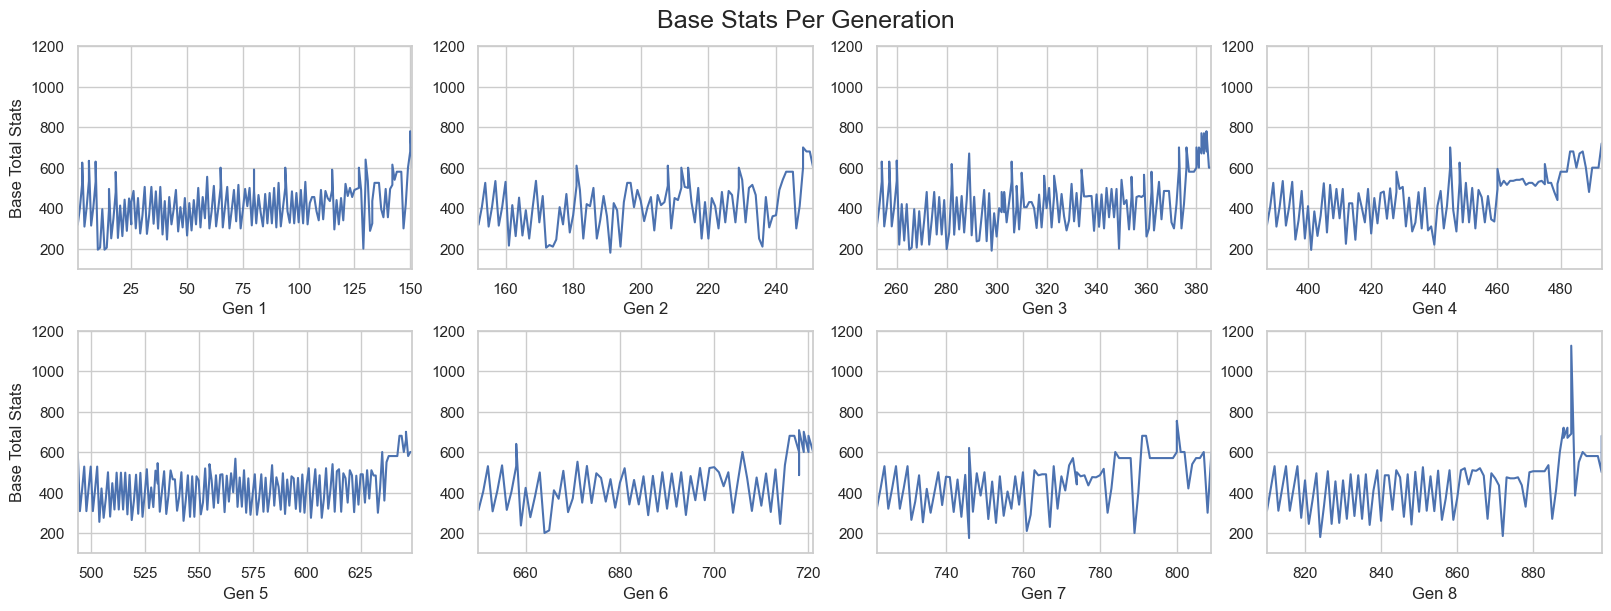

In [6]:
sns.set_style('whitegrid')

f, axs = plt.subplots(2, 4, figsize = (16, 6), layout = 'constrained')
f.suptitle('Base Stats Per Generation', fontsize = 18)

for i, ax in enumerate(axs.flatten()):
    tmp = pokedex[pokedex['generation'] == i+1]
    ax.plot('pokedex_number', 'total_points', data = tmp)
    ax.set(ylim = (100, 1200), xlim = (tmp['pokedex_number'].min(), tmp['pokedex_number'].max()), xlabel = 'Gen ' + str(i+1))
    if i == 0 or i == 4: 
        ax.set(ylabel = 'Base Total Stats') 
    #else: 
    #    ax.yaxis.set_ticklabels([])

Le medie alte per le generazioni 7 e 8 sono dovute alla **forte presenza di Pokémon non normali** (riscontrabile nell'analisi precedente). Nella quarta si ha invece una **media di statistiche particolarmente alta** per l'ultima trentina di entry. (MegaEvo!)

# 3 - Quali tipi sono predominanti nel competitivo?

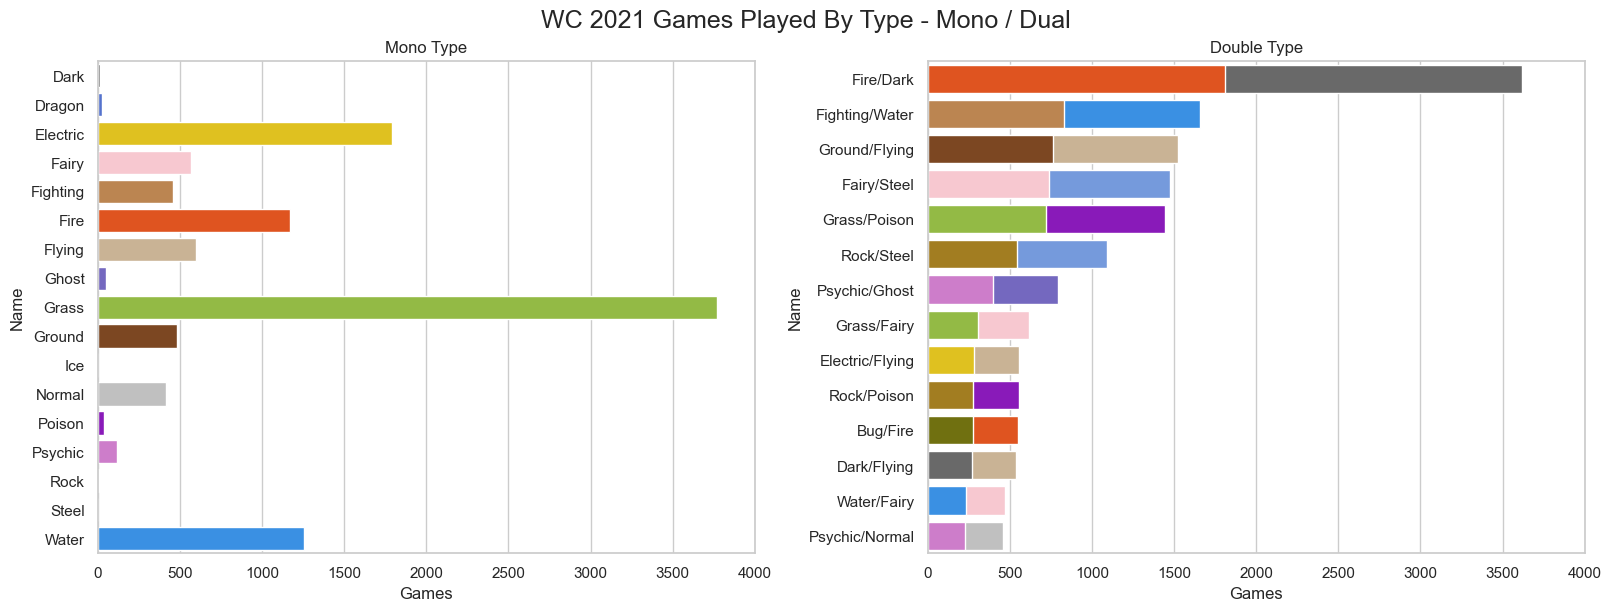

In [7]:
vgc_mono = pd.merge(vgc_2021, mono_type)
vgc_mono = vgc_mono.rename(columns = {'type_1':'type'})
MT = vgc_mono.groupby(['type'])['GP'].sum().reset_index()

vgc_dual = pd.merge(vgc_2021, dual_type)
DT = vgc_dual.groupby(['type_1', 'type_2'])['GP'].sum().reset_index()
DT = DT.assign(GPh = lambda x: x['GP'] / 2, combined_type = lambda x: x['type_1'] + '/' + x['type_2'])
DT = DT[DT['GP'] > 400].sort_values('GP', ascending = False)

sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(1, 2, figsize = (16, 6), layout = 'constrained')
f.suptitle('WC 2021 Games Played By Type - Mono / Dual', fontsize = 18);

sns.barplot(ax = ax[0], x = 'GP', y = 'type', data = MT, palette = pal, hue = MT['type']).set_title('Mono Type')
ax[0].set(xlim = (0, 4000), ylabel = 'Name', xlabel = 'Games');
#ax[0].set_xscale("log")

sns.barplot(ax = ax[1], x = 'GP', y = 'combined_type', data = DT, palette = pal, legend = False, hue = DT['type_2']).set_title('Double Type')
sns.barplot(ax = ax[1], x = 'GPh', y = 'combined_type', data = DT, palette = pal, legend = False, hue = DT['type_1'])
ax[1].set(xlim = (0, 4000), ylabel = 'Name', xlabel = 'Games');

**Sembra** a primo impatto che nei mono-tipo ci sia **predominanza assoluta** di tipi **Erba**, Acqua ed Elettro, mentre nei doppio tipo si ha una situazione molto simile con **Fuoco/Buio**, Lotta/Acqua, Terra/Volante e **Fata/Acciaio**

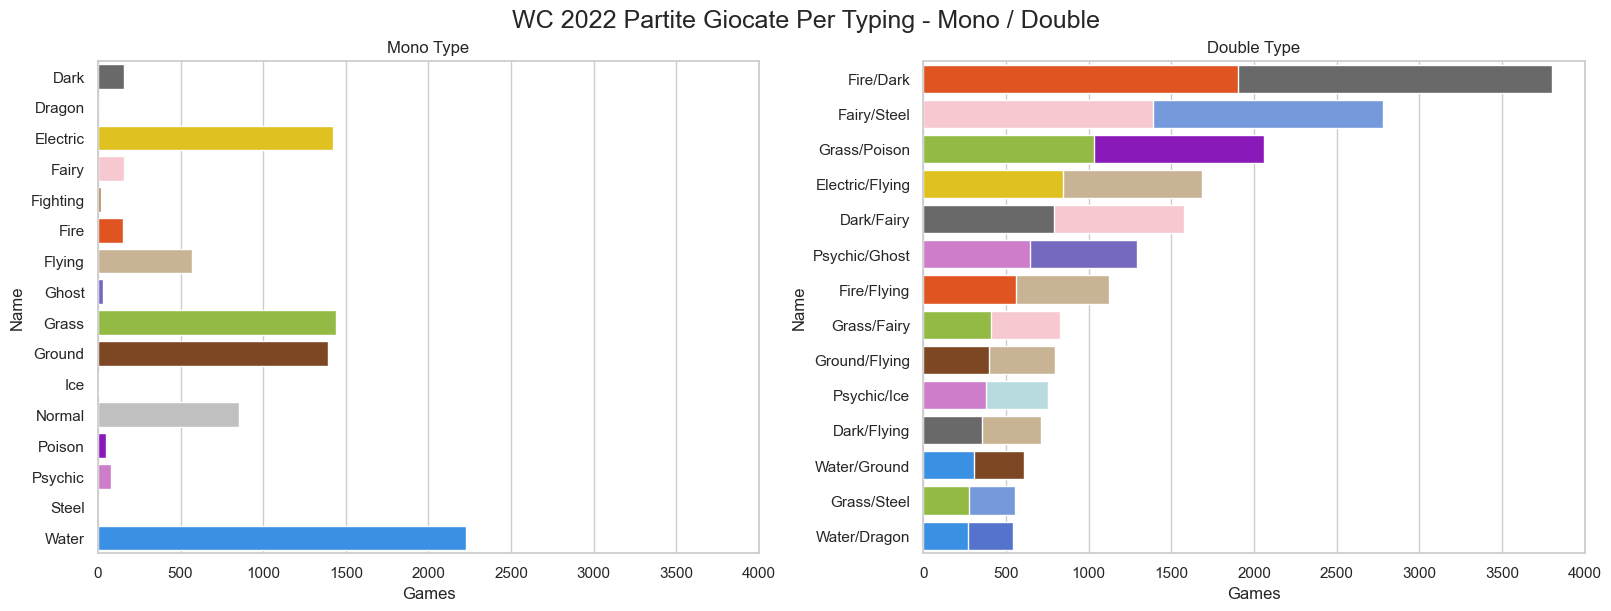

In [8]:
vgc_mono = pd.merge(vgc_2022, mono_type)
vgc_mono = vgc_mono.rename(columns = {'type_1':'type'})
MT = vgc_mono.groupby(['type'])['GP'].sum().reset_index()

vgc_dual = pd.merge(vgc_2022, dual_type)
DT = vgc_dual.groupby(['type_1', 'type_2'])['GP'].sum().reset_index()
DT = DT.assign(GPh = lambda x: x['GP'] / 2, combined_type = lambda x: x['type_1'] + '/' + x['type_2'])
DT = DT[DT['GP'] > 400].sort_values('GP', ascending = False)

sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(1, 2, figsize = (16, 6), layout = 'constrained')
f.suptitle('WC 2022 Partite Giocate Per Typing - Mono / Double', fontsize = 18);

sns.barplot(ax = ax[0], x = 'GP', y = 'type', data = MT, palette = pal, hue = MT['type']).set_title('Mono Type')
ax[0].set(xlim = (0, 4000), ylabel = 'Name', xlabel = 'Games');

sns.barplot(ax = ax[1], x = 'GP', y = 'combined_type', data = DT, palette = pal, legend = False, hue = DT['type_2']).set_title('Double Type')
sns.barplot(ax = ax[1], x = 'GPh', y = 'combined_type', data = DT, palette = pal, legend = False, hue = DT['type_1'])
ax[1].set(xlim = (0, 4000), ylabel = 'Name', xlabel = 'Games');

L'anno dopo la situazione monopolistica nei mono-tipo sembra cessata, mentre nei doppio tipo **Fuoco/Buio** e **Fata/Acciaio** continuano a predominare. Quindi sono utilizzati davvero molti Pokémon con questa combinazione di tipi... *...Giusto?*

# 4 - C'è equilibrio tra vittorie e sconfitte per Pokémon?

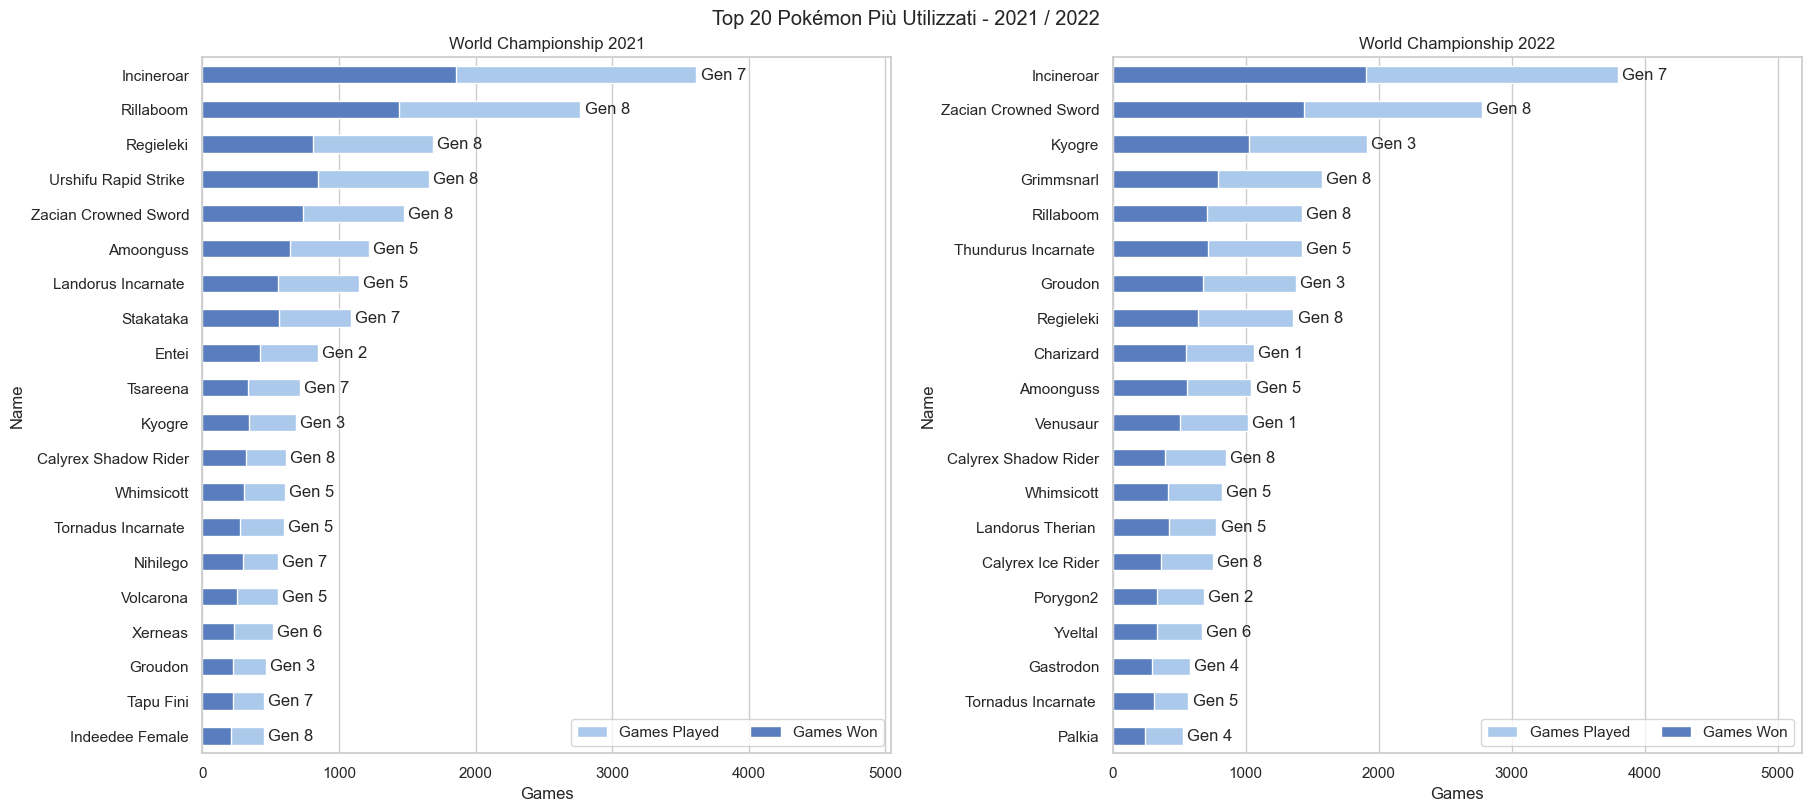

In [9]:
vgc_2021_gen = pd.merge(vgc_2021, pokedex[['name', 'generation', 'total_points']])
vgc_2022_gen = pd.merge(vgc_2022, pokedex[['name', 'generation', 'total_points']])

sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(1, 2, figsize = (18, 8), layout = 'constrained')
f.suptitle('Top 20 Pokémon Più Utilizzati - 2021 / 2022');

sns.set_color_codes('pastel')
sns.barplot(ax = ax[0], x = 'GP', y = 'name', data = vgc_2021_gen.head(20), label = 'Games Played', color = 'b', width = .5).set_title('World Championship 2021')
for container in ax[0].containers:
    ax[0].bar_label(container, labels = ('Gen ' + vgc_2021_gen['generation'].head(20).apply(str)), padding = 3)

sns.set_color_codes('muted')
sns.barplot(ax = ax[0], x = 'GW', y = 'name', data = vgc_2021_gen.head(20), label = 'Games Won', color = 'b', width = .5)
ax[0].legend(ncol = 2, loc = 'lower right', frameon = True)
ax[0].set(xlim = (0, 5045), ylabel = 'Name', xlabel = 'Games');

sns.set_color_codes('pastel')
sns.barplot(ax = ax[1], x = 'GP', y = 'name', data = vgc_2022_gen.head(20), label = 'Games Played', color = 'b', width = .5).set_title('World Championship 2022')
for container in ax[1].containers:
    ax[1].bar_label(container, labels = ('Gen ' + vgc_2022_gen['generation'].head(20).apply(str)), padding = 3)

sns.set_color_codes('muted')
sns.barplot(ax = ax[1], x = 'GW', y = 'name', data = vgc_2022_gen.head(20), label = 'Games Won', color = 'b', width = .5)
ax[1].legend(ncol = 2, loc = 'lower right', frameon = True)
ax[1].set(xlim = (0, 5180), ylabel = 'Name', xlabel = 'Games');

Vedendo i Pokémon più utilizzati in ciascun mondiale, prima di entrare nel dettaglio possiamo notare che alla testa di entrambe le classifiche c'è Incineroar, **Tipo Fuoco/Buio**...

E **unico** tipo Fuoco/Buio della lista, quindi **l'osservazione 3** di fatto **perde parte di significato** rispetto alla domanda che ci siamo posti inizialmente.

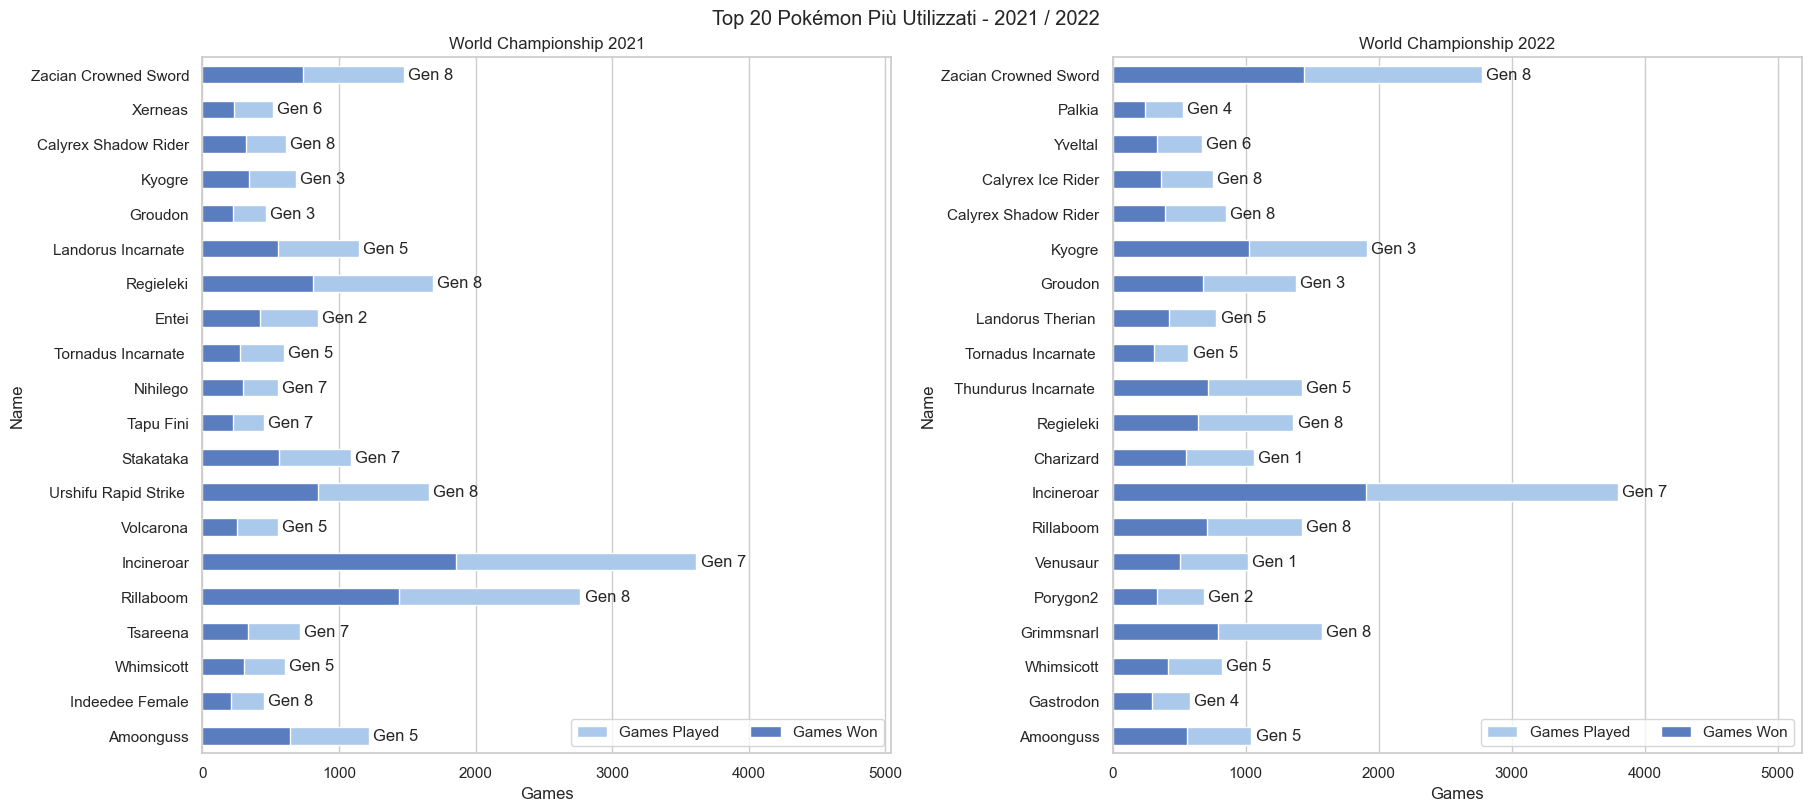

In [10]:
vgc_2021_gen_o = vgc_2021_gen.head(20).sort_values('total_points', ascending=False)
vgc_2022_gen_o = vgc_2022_gen.head(20).sort_values('total_points', ascending=False)

sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(1, 2, figsize = (18, 8), layout = 'constrained')
f.suptitle('Top 20 Pokémon Più Utilizzati - 2021 / 2022');

sns.set_color_codes('pastel')
sns.barplot(ax = ax[0], x = 'GP', y = 'name', data = vgc_2021_gen_o, label = 'Games Played', color = 'b', width = .5).set_title('World Championship 2021')
for container in ax[0].containers:
    ax[0].bar_label(container, labels = ('Gen ' + vgc_2021_gen_o['generation'].apply(str)), padding = 3)

sns.set_color_codes('muted')
sns.barplot(ax = ax[0], x = 'GW', y = 'name', data = vgc_2021_gen_o, label = 'Games Won', color = 'b', width = .5)
ax[0].legend(ncol = 2, loc = 'lower right', frameon = True)
ax[0].set(xlim = (0, 5045), ylabel = 'Name', xlabel = 'Games');

sns.set_color_codes('pastel')
sns.barplot(ax = ax[1], x = 'GP', y = 'name', data = vgc_2022_gen_o, label = 'Games Played', color = 'b', width = .5).set_title('World Championship 2022')
for container in ax[1].containers:
    ax[1].bar_label(container, labels = ('Gen ' + vgc_2022_gen_o['generation'].apply(str)), padding = 3)

sns.set_color_codes('muted')
sns.barplot(ax = ax[1], x = 'GW', y = 'name', data = vgc_2022_gen_o, label = 'Games Won', color = 'b', width = .5)
ax[1].legend(ncol = 2, loc = 'lower right', frameon = True)
ax[1].set(xlim = (0, 5180), ylabel = 'Name', xlabel = 'Games');

Ordinando poi oer statistiche totali, si può vedere che **le statistiche  non sono proporzionali all'utilizzo**. Per quanto riguarda la situazione vittorie/sconfitte si ha una **situazione equilibrata**, sempre sul 50% di vittoria. Ciò sta ad indicare **l'assenza di Pokémon che richiedano limitazioni**.

# 5 - Quali sono le mosse maggiormente utilizzate?

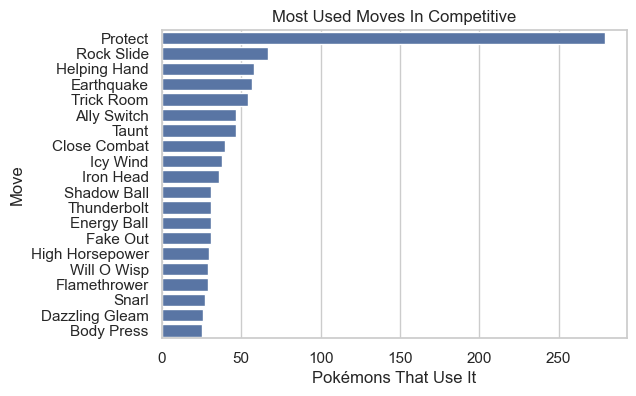

In [11]:
moves_amount = moves[moves['Unique'] == 0]['Move'].value_counts()
f, ax = plt.subplots(figsize = (6, 4))
g = sns.barplot(ax = ax, data = moves_amount.head(20), orient = 'h').set(xlabel = 'Pokémons That Use It', ylabel = 'Move', title = 'Most Used Moves In Competitive')

Qua una cosa spunta decisamente all'occhio: la **completa predominanza di Protect**, mossa dall'effetto unico che permette di non prendere danno per un turno... Seguono mosse sia di status che danneggianti... *anche se*

Anche se ci sono diverse mosse **peculiari** (caratteristiche di un pokémon) che vengono utilizzate più del **90%** delle volte che si gioca il suddetto Pokémon.

In [12]:
uniques = moves[moves['Unique'] == 1].sort_values('Use_Percentage', ascending = False).reset_index()
pd.options.display.float_format = '{:.2%}'.format
display(uniques[['Move', 'Use_Percentage', 'Pokemon']].head(13))

,Move,Use_Percentage,Pokemon
0,Behemoth Blade,100.00%,Zacian Crowned Sword
1,Moongeist Beam,100.00%,Lunala
2,Fishious Rend,100.00%,Dracovish
3,Astral Barrage,100.00%,Calyrex Shadow Rider
4,Dragon Energy,100.00%,Regidrago
5,Transform,100.00%,Ditto
6,Moongeist Beam,100.00%,Dawn Wings Necrozma
7,Fishious Rend,99.98%,Arctovish
8,Behemoth Bash,99.97%,Zamazenta Crowned Shield
9,Aura Wheel,99.95%,Morpeko Full Belly Mode


# Conclusioni

Si è potuto notare come le **base stats ed il tipo non vadano ad influire sull'utilizzo**, in generale ogni tipo ha come esponente il suo Pokémon più duttile (a prescindere da base stats), che diventa di conseguenza il più utilizzato.
La **release date** invece ha **influenza** in quanto le generazioni più recenti si vedono nettamente più utilizzate (fatta **eccezione per alcuni leggendari** di generazioni passate). 

Questi elementi indicano come **il competitivo**, a causa della continua introduzione di nuove mosse e meccaniche, sia **in continua evoluzione** e  con necessità di evoluzione in termini di strategie, **preferendo** quindi utilizzare Pokémon dotati di **utility e sinergie al posto di basarsi sulle statistiche**.

## Trivia - Missingno Library

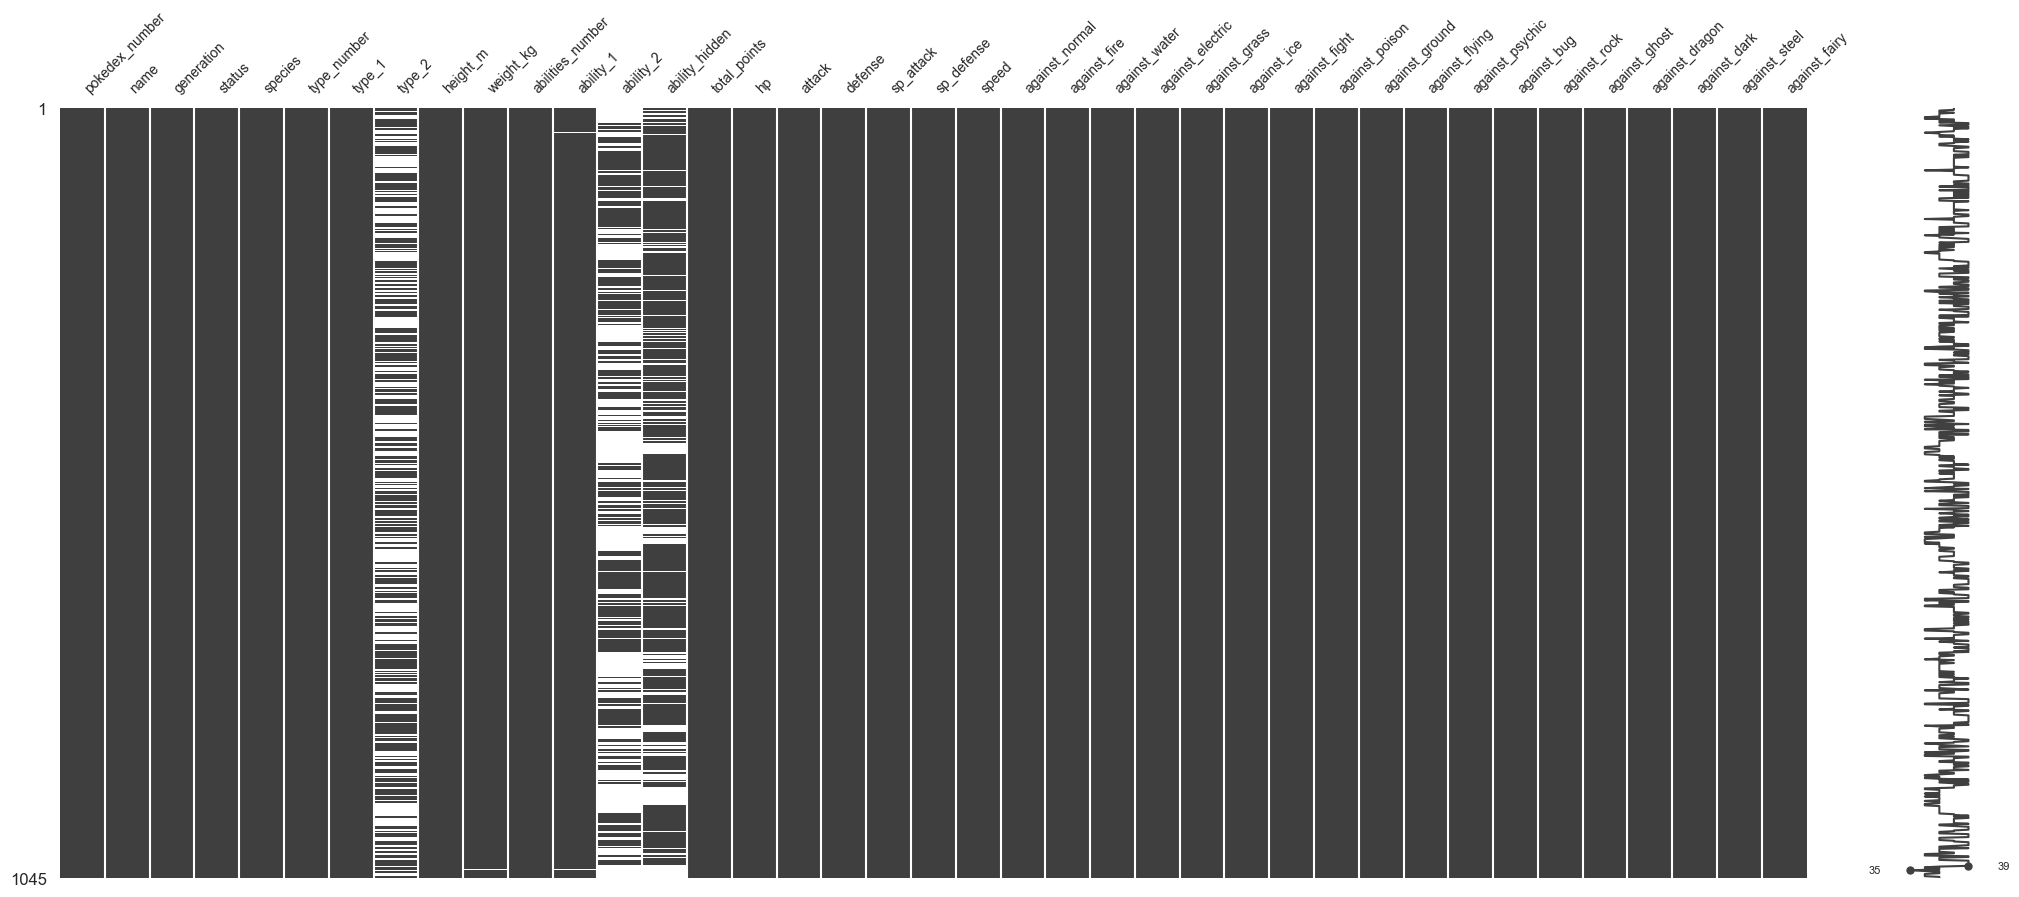

In [13]:
import missingno as msno
%matplotlib inline
msno.matrix(pokedex, fontsize = 10);

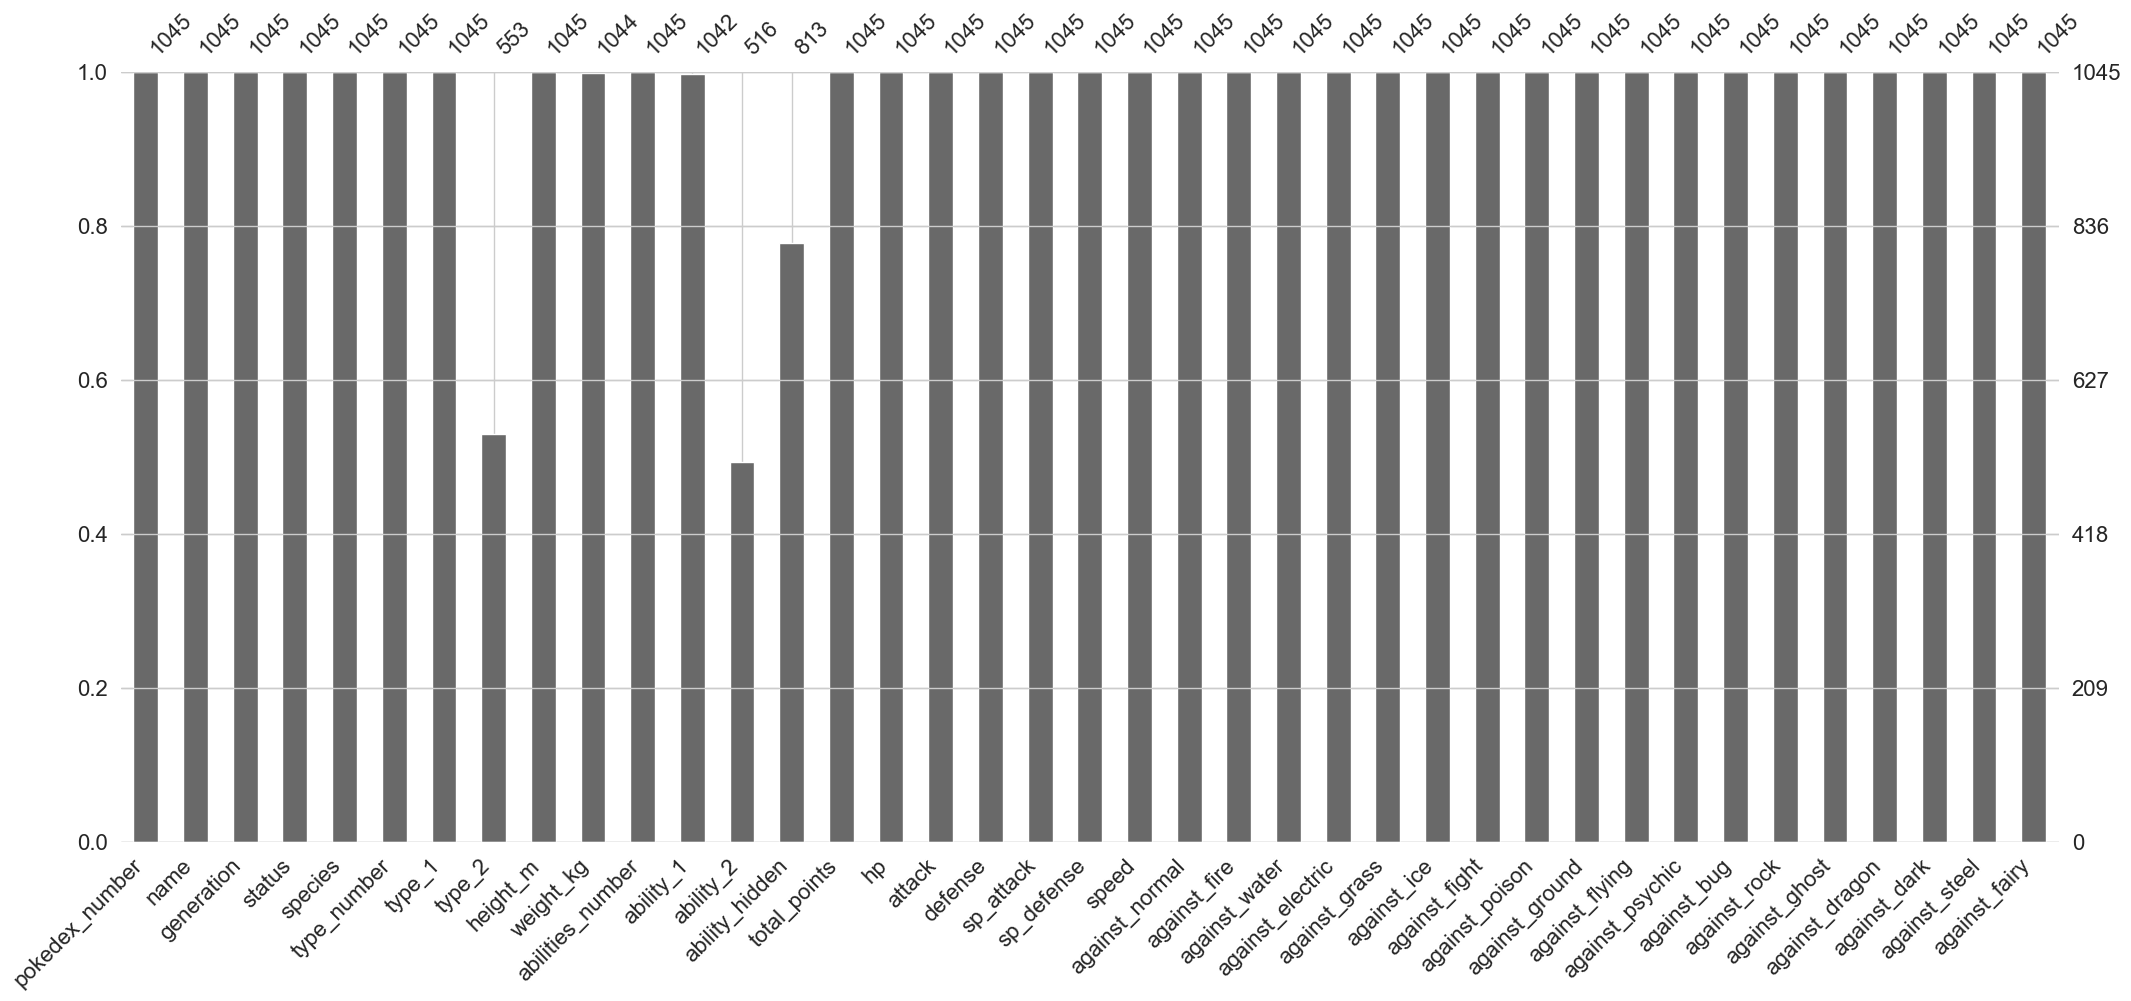

In [14]:
msno.bar(pokedex);

Con lo stesso nome del 'Glitchmon' Missingno (riferimento?), permette di verificare la presenza di dati nulli all'interno di dataset.